In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy import stats
import os


In [2]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [3]:
df = pd.read_pickle('data/processed/train_data.pkl')

## Data

In [4]:
df = df[(np.abs(stats.zscore(df.loc[:,df.columns.values[3:]])) < 2).all(axis=1)].copy()

In [5]:
df.columns.values[0:5]

array(['Batch_ID', 'Gas_ID', 'Gas_Conc', 'sample_no', 's1_f1'],
      dtype=object)

In [6]:
data = df.values

In [7]:
batch_id = data[:,0]
y = data[:,1:3]
X = data[:,3:]

## Scale

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X)

StandardScaler()

In [10]:
X_scaled = scaler.transform(X)

# PCA

In [11]:
pca = PCA()
pca.fit(X_scaled)

PCA()

(0.0, 50.0)

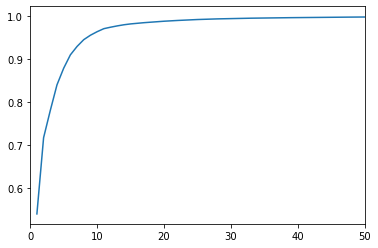

In [14]:
plt.plot(list(range(1,130)),np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,50)

In [15]:
len([pca for pca in np.cumsum(pca.explained_variance_ratio_) if pca < .999])

58

In [16]:
X_pca = pca.transform(X)

In [17]:
pca_data = np.concatenate((y,X_pca),axis=1)

In [20]:
pca_df = pd.DataFrame(pca_data, columns=list(df.columns.values[1:3])+['PCA_{}'.format(pca) for pca in range(1,130)])

In [21]:
#pca_df['Gas_Conc'] = pca_df.Gas_Conc.astype(float)

<AxesSubplot:xlabel='PCA_1', ylabel='Gas_Conc'>

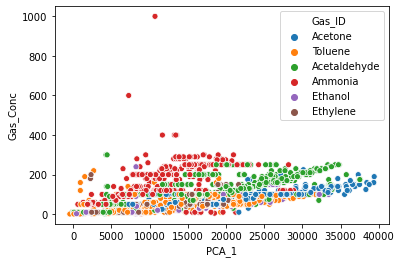

In [22]:
sns.scatterplot(x='PCA_1',y='Gas_Conc',data=pca_df,hue='Gas_ID')

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

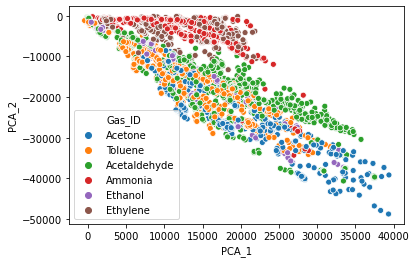

In [23]:
sns.scatterplot(x='PCA_1',y='PCA_2',data=pca_df,hue='Gas_ID')

In [25]:
fig = px.scatter_3d(pca_df, x='PCA_1', y='PCA_2', z='Gas_Conc',
              color='Gas_ID')
fig.show()

In [27]:
fig = px.scatter_3d(pca_df, x='PCA_1', y='PCA_2', z='PCA_3',
              color='Gas_ID')
fig.show()

In [30]:
pca.components_[:,0:2]

array([[-4.52420685e-02,  3.84771179e-02],
       [-2.88169431e-02, -1.44847505e-01],
       [ 7.80146986e-02, -2.53955892e-02],
       [ 2.73527234e-02,  5.58220964e-02],
       [-2.70692690e-02,  1.67289493e-01],
       [ 3.78923655e-01, -1.77800544e-01],
       [ 8.89606908e-02,  1.69571307e-01],
       [ 3.07793928e-02,  7.09438221e-02],
       [-5.74037856e-03,  1.09656201e-03],
       [-1.07068678e-01, -4.81915456e-02],
       [ 1.65830553e-02, -8.74097866e-02],
       [ 2.94818051e-01,  5.32399547e-02],
       [ 1.19245020e-01,  5.17353903e-02],
       [-2.78808268e-01, -3.18142713e-02],
       [-3.29491080e-01,  1.70148841e-02],
       [ 3.66288993e-01,  5.91089473e-03],
       [-1.31942926e-01, -8.83052109e-02],
       [ 1.91408683e-01, -8.79775317e-02],
       [-3.47280581e-01,  1.36707993e-02],
       [-1.48024642e-01,  9.90525575e-02],
       [-2.19670844e-01, -9.22397246e-02],
       [ 8.99257499e-02, -9.22385908e-02],
       [ 1.10587994e-01,  4.19243875e-02],
       [ 1.

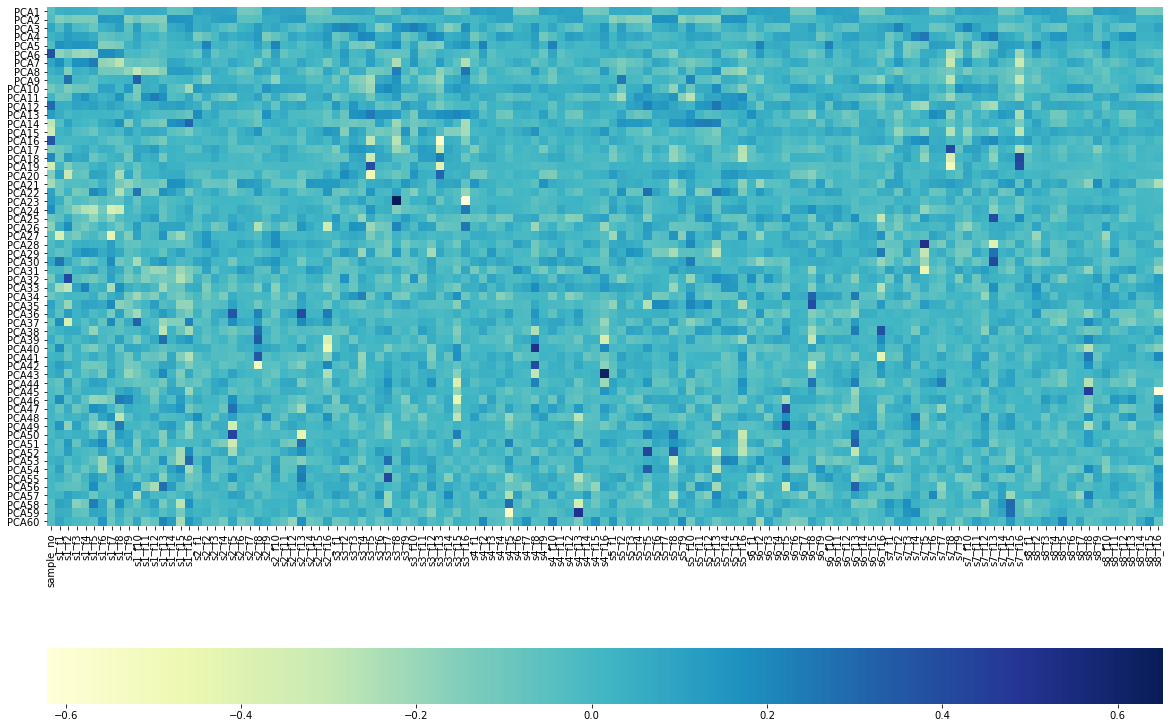

In [31]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(pca.components_[0:60,:],
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,61)],
                 xticklabels=list(df.columns.values[3:]),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

(0.0, 150.0)

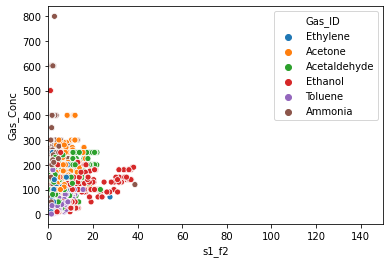

In [27]:
df.Gas_Conc = df.Gas_Conc.astype(float)
sns.scatterplot(x='s1_f2',y='Gas_Conc',data=df,hue='Gas_ID')
plt.xlim(0,150)

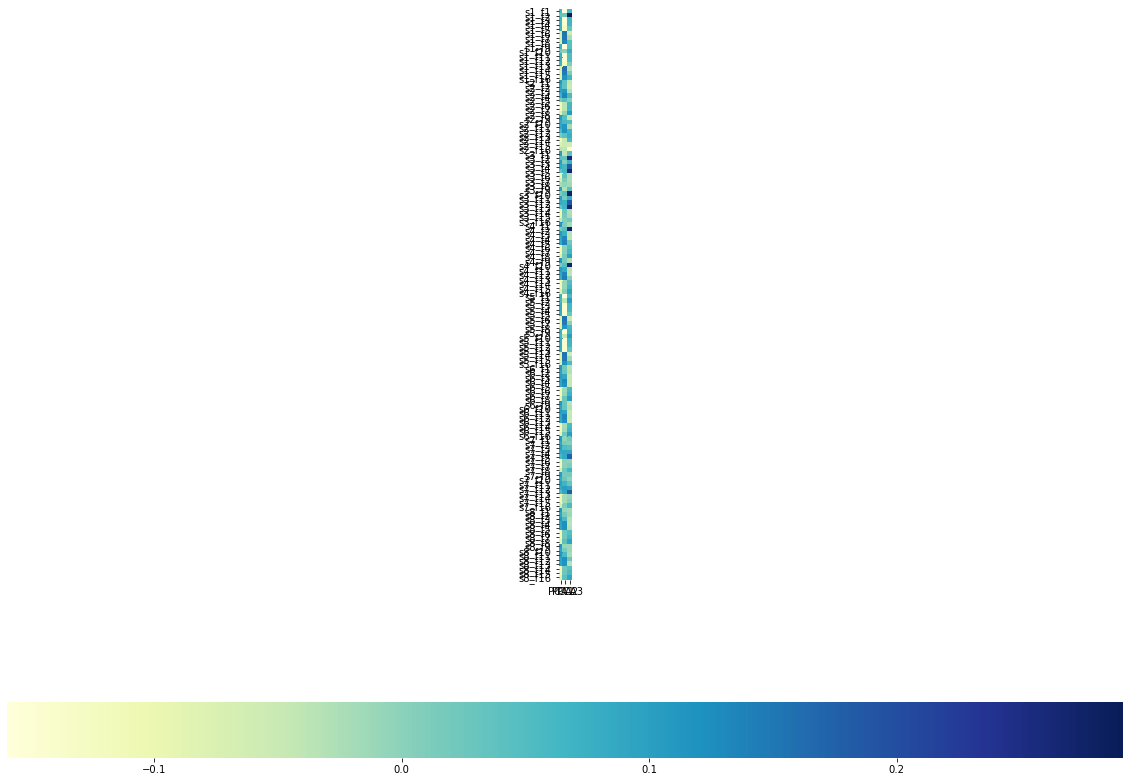

In [77]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(np.transpose(pca2.components_[0:3,:]),
                 cmap='YlGnBu',
                 xticklabels=[ "PCA"+str(x) for x in range(1,4)],
                 yticklabels=list(df.columns.values[3:]),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")